In [1]:
# Load
import matplotlib.pyplot as plt
import pandas as pd

raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)
raw_ohlcv.head()

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,9660,9820,9650,9750,65445,0.011411,000020
2019-01-22,9750,9860,9660,9800,42143,0.005128,000020
2019-01-23,9840,9880,9740,9820,31492,0.002041,000020
2019-01-24,9820,10000,9710,10000,109714,0.018330,000020
2019-01-25,10000,10100,9920,9980,24176,-0.002000,000020


In [2]:
multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]
single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)

In [3]:
from pa_tools.generators.price_based_generator import PriceBasedPositionGenerator
from pa_tools.generators.highlow_based_generator import HighLowBasedPositionGenerator

pb_pg = PriceBasedPositionGenerator()
hlb_pg = HighLowBasedPositionGenerator()

In [4]:
time_size = 90
position_size = 300
prices = single_ohlcv["close"]

pb_raw_position = pb_pg.get_raw_position(prices, time_size, position_size)
pb_raw_position

,positions
date,
2019-01-21,"[8140, 8140, 8140, 8140, 8140, 8140, 8140, 814..."
2019-01-22,"[8240, 8240, 8240, 8140, 8240, 8140, 8140, 814..."
2019-01-23,"[8140, 8140, 8240, 8560, 8140, 8560, 8560, 824..."
2019-01-24,"[8240, 8560, 8240, 8560, 8240, 8560, 8560, 814..."
2019-01-25,"[8240, 8230, 8140, 8140, 8240, 8230, 8140, 823..."
...,...
2024-01-11,"[7020, 6890, 7280, 7050, 6780, 6620, 6690, 692..."
2024-01-12,"[6750, 6850, 6620, 7210, 7020, 6610, 6340, 659..."
2024-01-15,"[6800, 7110, 6860, 6810, 7180, 6860, 6530, 713..."


In [5]:
time_size = 90
position_size = 300

prices = single_ohlcv["close"]
volumes = single_ohlcv["volume"]

pb_raw_volume_position = pb_pg.get_raw_volume_position(prices, volumes, time_size, position_size)
pb_raw_volume_position

,positions
date,
2019-01-21,"[8140, 8140, 8140, 8140, 8140, 8140, 8140, 814..."
2019-01-22,"[8240, 8140, 8140, 8240, 8140, 8240, 8240, 814..."
2019-01-23,"[8560, 8240, 8240, 8240, 8140, 8140, 8560, 824..."
2019-01-24,"[8140, 8140, 8240, 8560, 8240, 8240, 8560, 814..."
2019-01-25,"[8230, 8240, 8140, 8140, 8140, 8140, 8230, 814..."
...,...
2024-01-11,"[7050, 7390, 6830, 7240, 7210, 7020, 7240, 684..."
2024-01-12,"[6510, 7060, 6820, 7450, 6950, 6560, 6940, 685..."
2024-01-15,"[7390, 6940, 6980, 6870, 6750, 6610, 6950, 745..."


In [6]:
time_size = 90
position_size = 300

prices = single_ohlcv["close"]
volumes = single_ohlcv['volume']

pb_time_dependent_position = pb_pg.get_time_dependent_position(prices, time_size, position_size)
pb_time_dependent_position

,positions
date,
2019-01-21,"[8140, 8140, 8140, 8140, 8140, 8140, 8140, 814..."
2019-01-22,"[8240, 8240, 8140, 8140, 8140, 8240, 8240, 814..."
2019-01-23,"[8240, 8240, 8140, 8560, 8560, 8240, 8560, 856..."
2019-01-24,"[8560, 8240, 8560, 8560, 8560, 8560, 8560, 856..."
2019-01-25,"[8230, 8560, 8560, 8560, 8560, 8560, 8230, 814..."
...,...
2024-01-11,"[7150, 7290, 7020, 7240, 7200, 7180, 7030, 680..."
2024-01-12,"[7480, 7480, 7180, 7390, 7090, 6810, 7220, 719..."
2024-01-15,"[7240, 7020, 7210, 7030, 6970, 7060, 6820, 706..."


In [7]:
time_size = 90
position_size = 300

prices = single_ohlcv["close"]
volumes = single_ohlcv["volume"]

pb_time_dependent_volume_position = pb_pg.get_time_dependent_volume_position(
    prices, volumes, time_size, position_size
)
pb_time_dependent_volume_position

,positions
date,
2019-01-21,"[8140, 8140, 8140, 8140, 8140, 8140, 8140, 814..."
2019-01-22,"[8140, 8140, 8140, 8240, 8240, 8240, 8240, 824..."
2019-01-23,"[8140, 8560, 8560, 8140, 8140, 8560, 8140, 856..."
2019-01-24,"[8140, 8560, 8560, 8240, 8560, 8140, 8560, 856..."
2019-01-25,"[8230, 8560, 8560, 8240, 8230, 8140, 8230, 856..."
...,...
2024-01-11,"[6770, 6980, 7070, 6850, 6800, 7000, 7300, 704..."
2024-01-12,"[6530, 7040, 7390, 7390, 6690, 7040, 7450, 739..."
2024-01-15,"[7070, 6580, 7030, 6770, 7390, 7000, 7200, 700..."


In [8]:
time_size = 90
position_size = 300

highs = single_ohlcv["high"]
lows = single_ohlcv["low"]

hlb_raw_position = hlb_pg.get_raw_position(highs, lows, time_size, position_size)
hlb_raw_position

,positions
date,
2019-01-21,"[7886.768318399182, 7886.768318399182, 7886.76..."
2019-01-22,"[8419.386620071054, 8419.386620071054, 8419.38..."
2019-01-23,"[8419.386620071054, 8447.359071409646, 8419.38..."
2019-01-24,"[7886.768318399182, 8419.386620071054, 8447.35..."
2019-01-25,"[8419.386620071054, 8290.16567287748, 7886.768..."
...,...
2024-01-11,"[6612.3332094234875, 6637.707201787267, 7294.3..."
2024-01-12,"[6915.042549293121, 6742.275326584632, 6951.16..."
2024-01-15,"[7166.69132682814, 7294.371098008027, 7252.662..."


In [9]:
time_size = 90
position_size = 300

highs = single_ohlcv["high"]
lows = single_ohlcv["low"]
volumes = single_ohlcv["volume"]

hlb_raw_volume_position = hlb_pg.get_raw_volume_position(highs, lows, volumes, time_size, position_size)
hlb_raw_volume_position

,positions
date,
2019-01-21,"[7852.527940622243, 7840.455367220992, 7970.24..."
2019-01-22,"[8375.693729102313, 7865.670403047683, 7982.31..."
2019-01-23,"[7895.5858628112155, 7892.216226759262, 8293.0..."
2019-01-24,"[8516.156753304387, 8224.612094797709, 7793.29..."
2019-01-25,"[7933.630328985564, 7670.766047104968, 8371.43..."
...,...
2024-01-11,"[6975.72923432283, 7309.325720691437, 7086.195..."
2024-01-12,"[6851.953646772194, 7167.987721585651, 6613.22..."
2024-01-15,"[6656.024733432384, 7017.6698975429, 6980.3303..."


In [10]:
time_size = 90
position_size = 300

highs = single_ohlcv["high"]
lows = single_ohlcv["low"]
volumes = single_ohlcv["volume"]

hlb_time_dependent_position = hlb_pg.get_time_dependent_position(highs, lows, time_size, position_size)
hlb_time_dependent_position

,positions
date,
2019-01-21,"[7744.655086536314, 7744.655086536314, 7744.65..."
2019-01-22,"[8293.039821295833, 8401.227469656378, 8401.22..."
2019-01-23,"[8423.819488956859, 8411.945629143893, 8423.81..."
2019-01-24,"[8273.994087669638, 8273.994087669638, 8552.13..."
2019-01-25,"[8297.631014646635, 8283.980756278143, 8518.94..."
...,...
2024-01-11,"[7264.860134096082, 7105.197983317909, 6872.77..."
2024-01-12,"[6696.841995396134, 7190.710434307721, 7241.70..."
2024-01-15,"[7100.97147335413, 6987.06025506975, 7096.5151..."


In [11]:
time_size = 90
position_size = 300

highs = single_ohlcv["high"]
lows = single_ohlcv["low"]
volumes = single_ohlcv["volume"]

hlb_time_dependent_volume_position = hlb_pg.get_time_dependent_volume_position(
    highs, lows, volumes, time_size, position_size
)
hlb_time_dependent_volume_position

,positions
date,
2019-01-21,"[7835.349030222941, 8021.73442006684, 7966.423..."
2019-01-22,"[8228.43260230508, 7898.534678846083, 8343.841..."
2019-01-23,"[8353.549716986572, 8295.53546165313, 8227.683..."
2019-01-24,"[7847.442766761635, 8295.288943568285, 8346.78..."
2019-01-25,"[8216.71491549919, 8301.013049142703, 8612.793..."
...,...
2024-01-11,"[7184.4657551675, 7239.931598927282, 7089.2997..."
2024-01-12,"[7282.2877925416215, 7000.923319950803, 7208.4..."
2024-01-15,"[6946.9386458670115, 7046.71335711028, 7288.46..."


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def visualize_position(df, positions, time_size):
    _df = df.tail(time_size)
    #
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    #
    ax1 = plt.subplot(gs[0])
    ax1.plot(_df.index, _df["close"], label="Close")
    ax1.plot(_df.index, _df["high"], label="High", linestyle="--")
    ax1.plot(_df.index, _df["low"], label="Low", linestyle="-.")
    ax1.legend(loc="upper left")
    plt.xticks(rotation=45)
    #
    ax2 = ax1.twinx()
    ax2.bar(
        _df.index,
        _df["volume"],
        label="Volume",
        alpha=0.3,
        color="grey",
    )
    ax2.legend(loc="upper right")
    #
    ax3 = plt.subplot(gs[1])
    sns.kdeplot(positions, fill=True, ax=ax3)
    plt.tight_layout()
    plt.show()
    return None

PRICE BASED


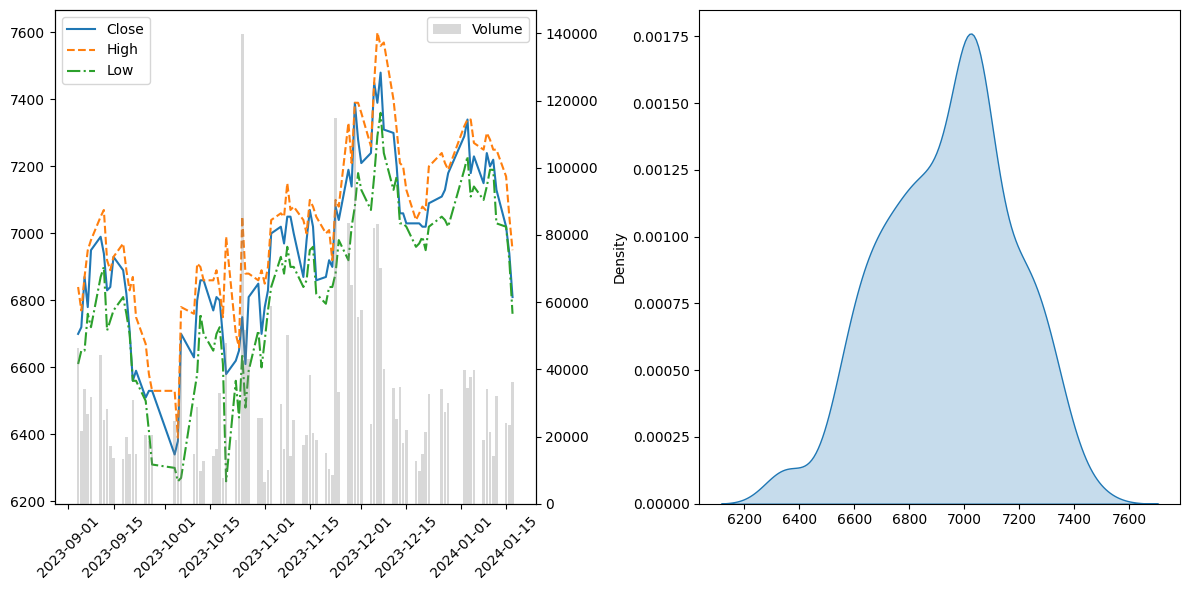

HighLow BASED


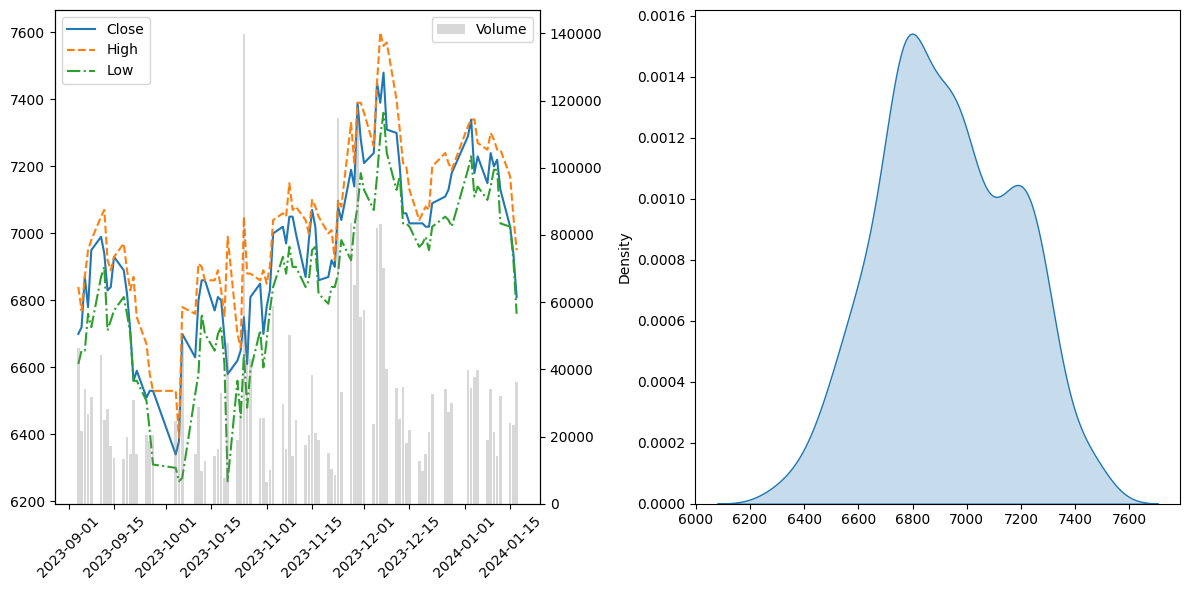

In [13]:
# RAW Position

print("PRICE BASED")
visualize_position(single_ohlcv, pb_raw_position['positions'].iloc[-1], time_size)
print("HighLow BASED")
visualize_position(single_ohlcv, hlb_raw_position["positions"].iloc[-1], time_size)

PRICE BASED


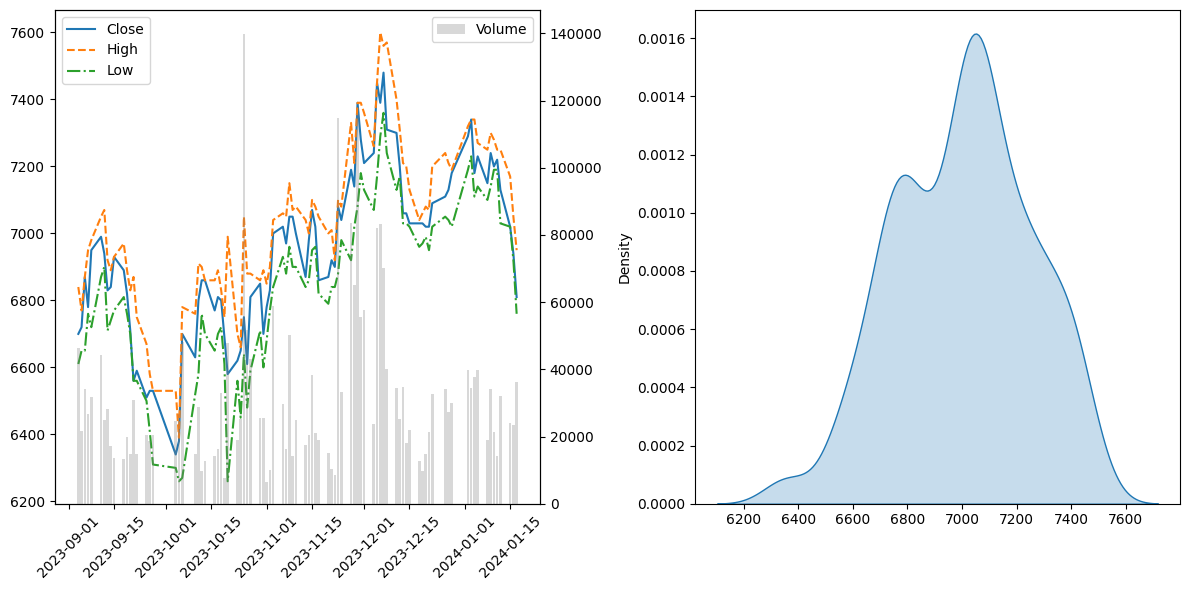

HighLow BASED


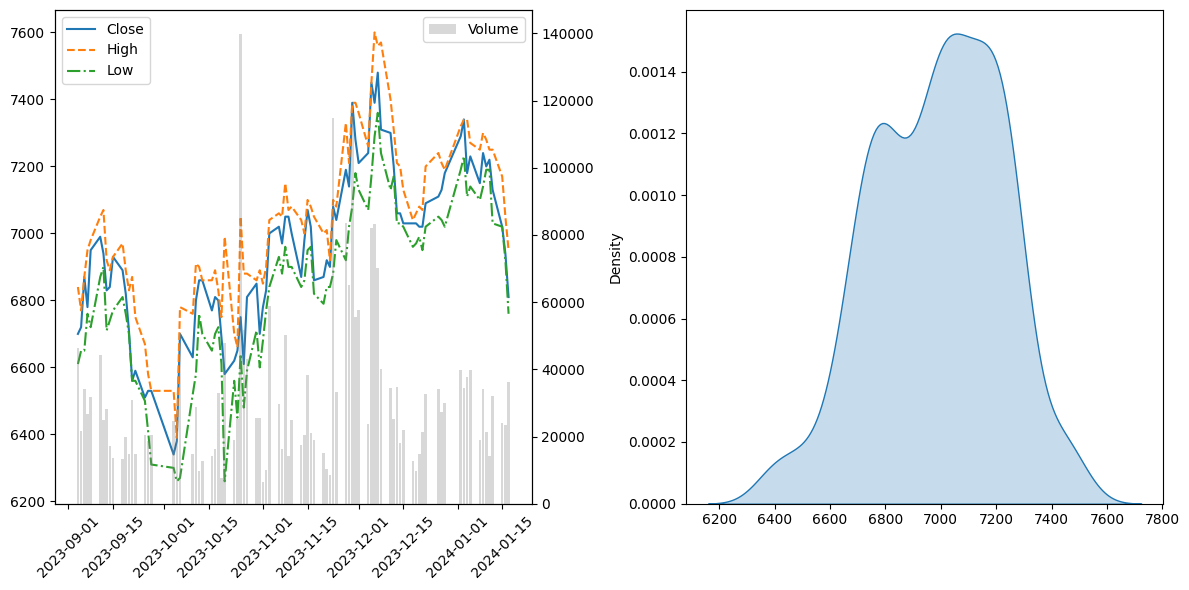

In [14]:
# Volume weighted position
print("PRICE BASED")
visualize_position(single_ohlcv, pb_raw_volume_position['positions'].iloc[-1], time_size)
print("HighLow BASED")
visualize_position(single_ohlcv, hlb_raw_volume_position["positions"].iloc[-1], time_size)

PRICE BASED


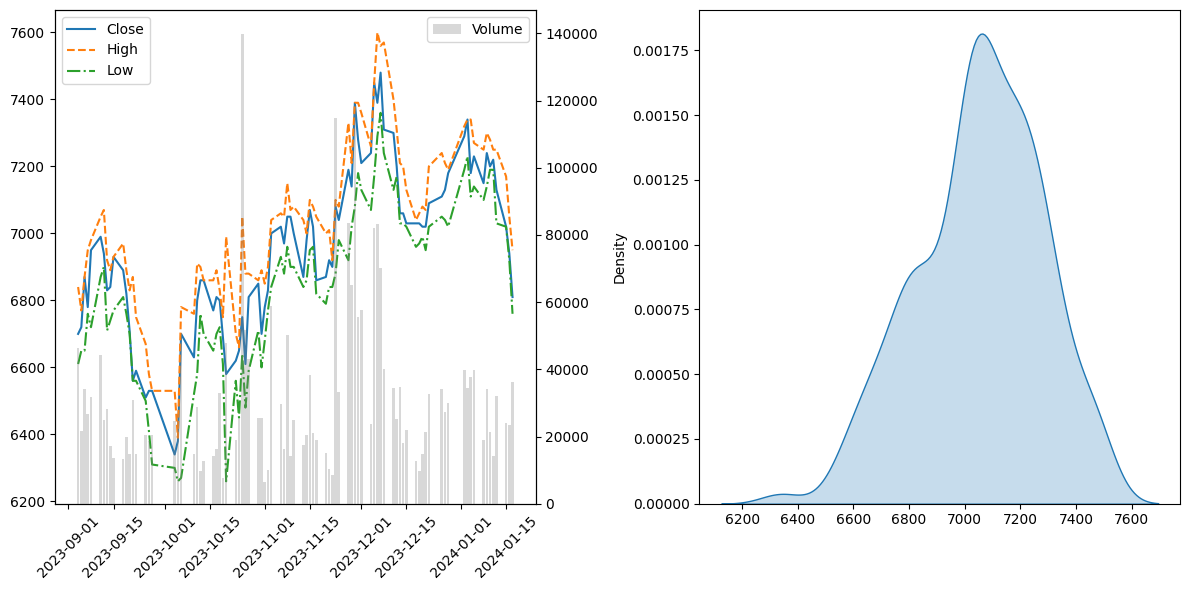

HighLow BASED


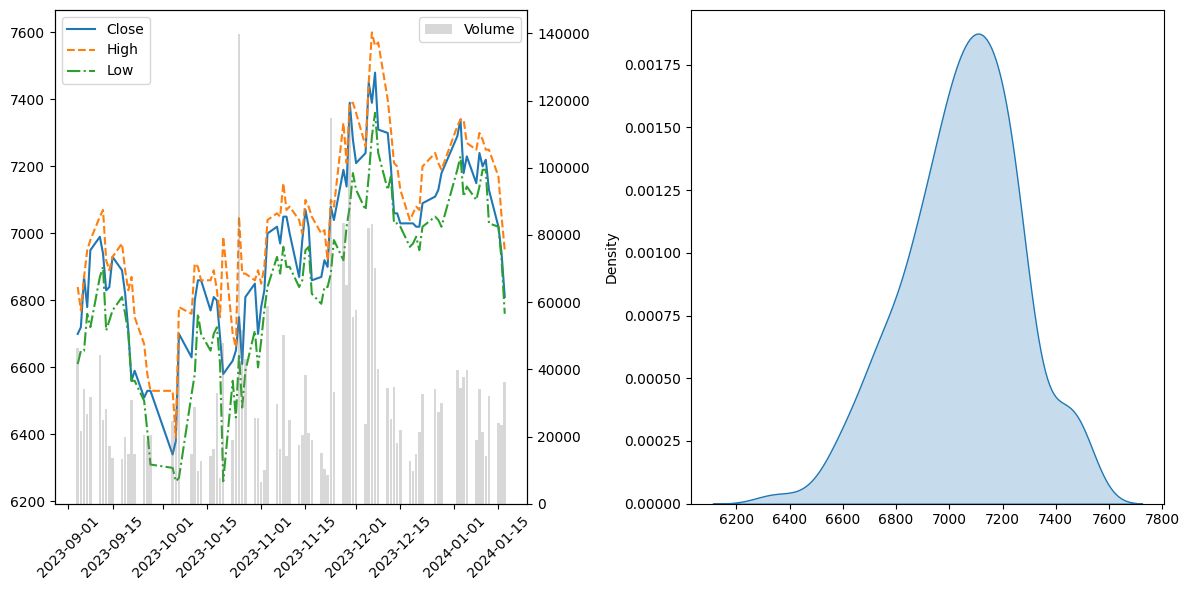

In [15]:
# time weighted position
print("PRICE BASED")
visualize_position(single_ohlcv, pb_time_dependent_position['positions'].iloc[-1], time_size)
print("HighLow BASED")
visualize_position(single_ohlcv, hlb_time_dependent_position["positions"].iloc[-1], time_size)

PRICE BASED


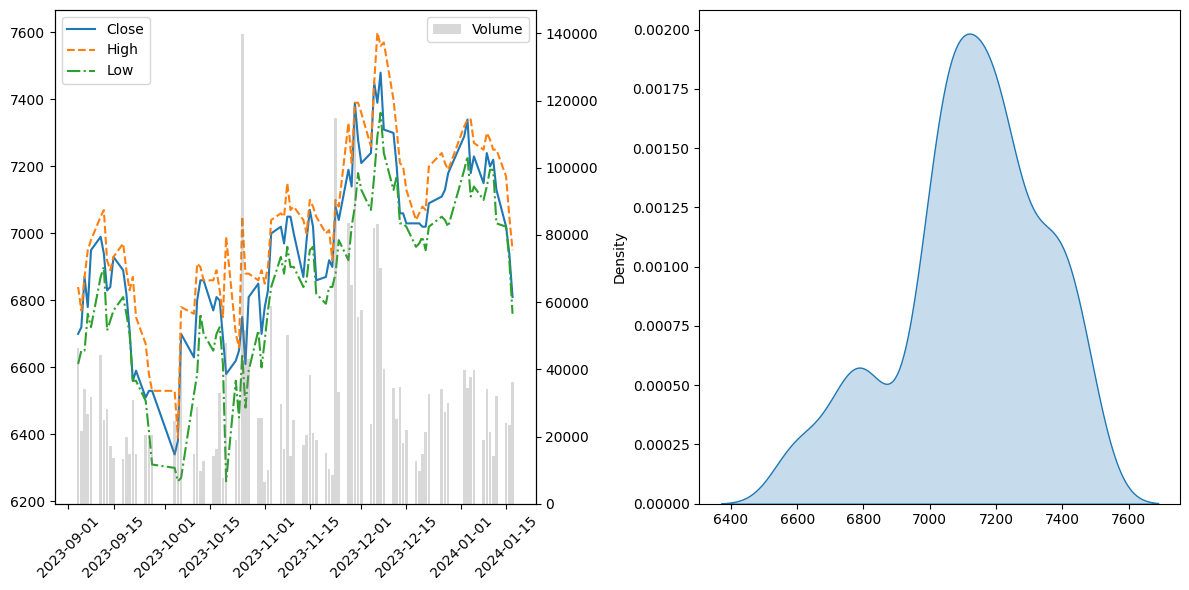

HighLow BASED


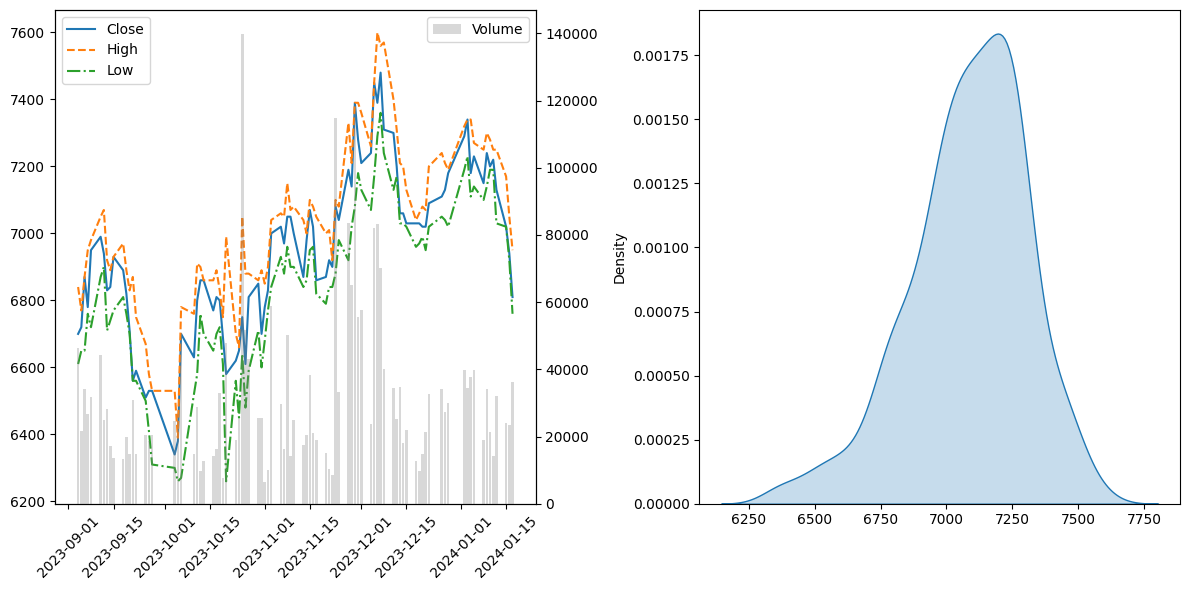

In [16]:
# Volume / Time weighted position

print("PRICE BASED")
visualize_position(single_ohlcv, pb_time_dependent_volume_position['positions'].iloc[-1], time_size)
print("HighLow BASED")
visualize_position(single_ohlcv, hlb_time_dependent_volume_position["positions"].iloc[-1], time_size)